# Problem Statement:

Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client demand and adjust inventory management. In a data warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more anomalies and common patterns can be discovered.


### APPROACH:
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.


### Results:
We have to build a solution that should able to predict the sales of the different stores of Big Mart according to the provided dataset.

In [1]:
# Importing necessary libraries/packages for EDA and model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


In [2]:
# importing test dataset as Pandas Dataframe
test = pd.read_csv('artifacts\data\Test.csv')


Test dataset information

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [4]:
# importing train dataset as Pandas Dataframe
Data = pd.read_csv(r'C:\Users\hp\Documents\archive (1)\train.csv') 

## Exploratory data analysis(EDA)

Train dataset information

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [44]:
Data.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Showing First 10 records of Training Dataset

In [6]:
Data.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

Shape of the Training dataset

In [7]:
Data.shape

(8523, 12)

Checking statistics of dataset

In [8]:
Data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Insight:there are seven columns in dataset having object datatype

Checking for null values in the dataset

In [10]:
Data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 there are null values only in two columns: "Item_Weight" and  "Outlet_Size" 

### Data imputation

In [13]:
col_names=Data.columns

In [14]:
for i in col_names:
    if Data[i].dtype == "object":
        Data[i] = Data[i].fillna(Data[i].mode()[0])
    else:
        Data[i] = Data[i].fillna(Data[i].mean())  

 Dealing with null values,replacing them with mode for object datatype and with mean for int/float datatype

In [15]:
Data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
Data.duplicated().sum() 

0

 There are no duplicates in dataset

In [31]:
Data["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
Data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
Data["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [34]:
Data["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [35]:
Data["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Data transformation

Performing label encoding on categorical columns

In [36]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [37]:
Data['Item_Type'] = le.fit_transform(Data['Item_Type'])

In [38]:
Data["Item_Type"].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [39]:
for i in col_names:
    if Data[i].dtype=="object":
        Data[i]=le.fit_transform(Data[i])
     

In [40]:
Data["Item_Fat_Content"].value_counts()

1    5089
2    2889
0     316
4     117
3     112
Name: Item_Fat_Content, dtype: int64

In [41]:
Data["Outlet_Size"].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

In [42]:
Data["Outlet_Location_Type"].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [43]:
Data["Outlet_Type"].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


### Data visualisation 

Showing all pairwise relationships and distribution of single variable as well as between two variables

In [20]:
sns.pairplot(Data)     

Checking for the presence of outliers using box plot

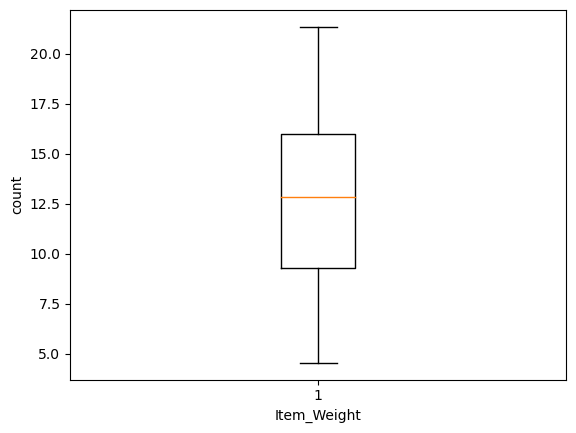

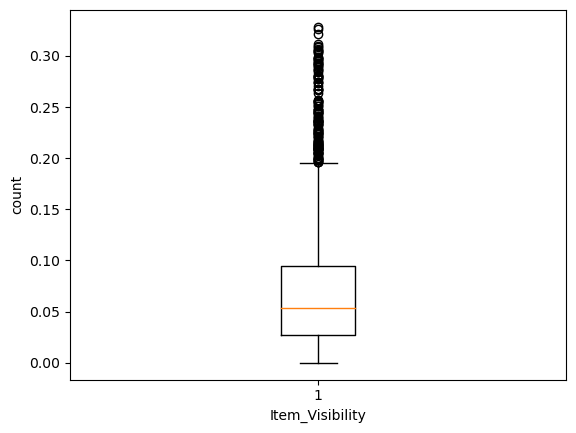

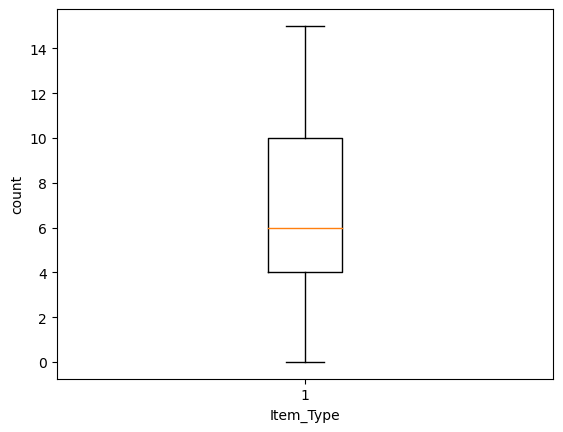

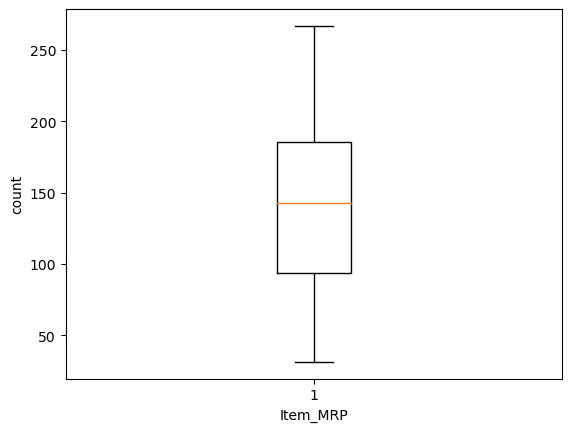

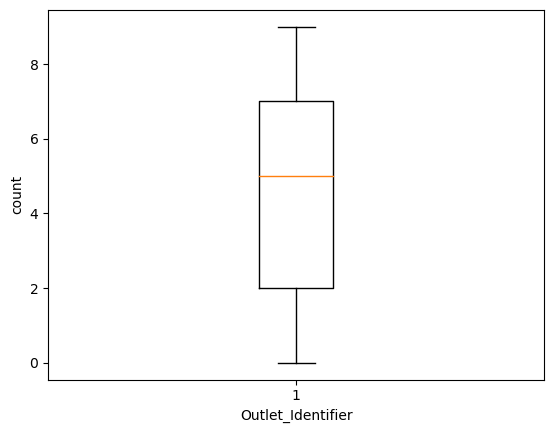

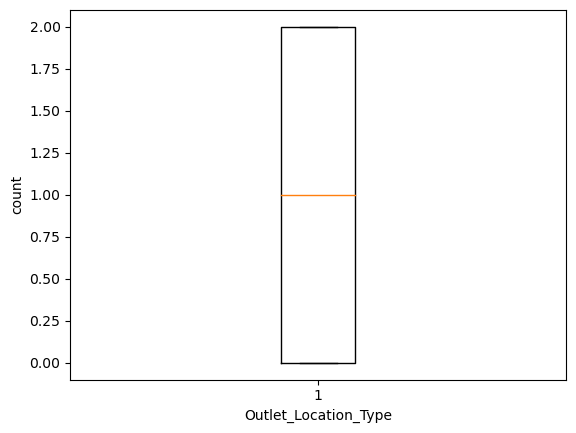

In [21]:
for j in col_names:
        plt.boxplot(Data[j])
        plt.xlabel(j)
        plt.ylabel('count')
        plt.show()

Insight: outliers present in item_outlet_sales

In [22]:
Data['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [23]:
Data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

Most values are zero for item visibility but visibility cannot be zero,Changing the Item_Visibility minimum values by mean

In [24]:
Data.loc[Data['Item_Visibility']==0,'Item_Visibility'] = Data['Item_Visibility'].mean()

In [25]:
Data['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

Outlier removal

In [26]:
Q1=Data["Item_Outlet_Sales"].quantile(0.25)
Q3=Data["Item_Outlet_Sales"].quantile(0.75)
IQR=Q3-Q1

In [27]:
lower_range =Q1-1.5*IQR
upper_range =Q3+1.5*IQR

In [28]:
Data = Data[(Data['Item_Outlet_Sales']>=lower_range) & (Data['Item_Outlet_Sales']<=upper_range)]

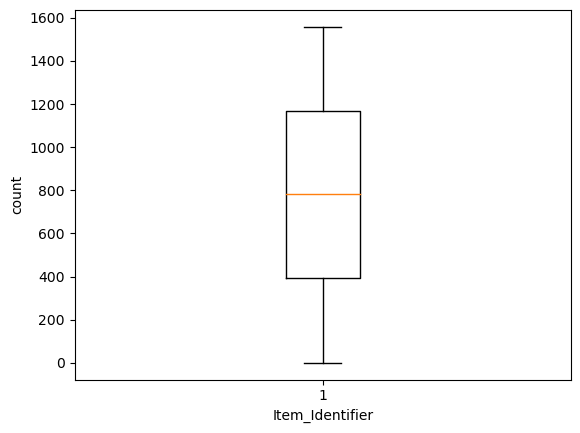

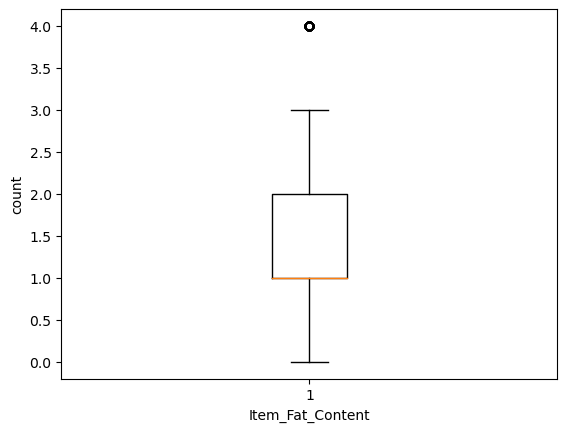

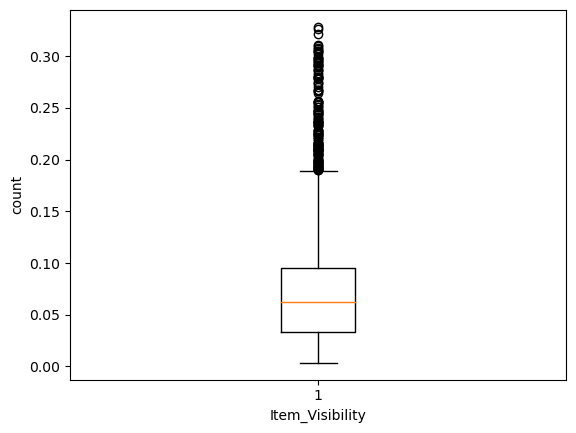

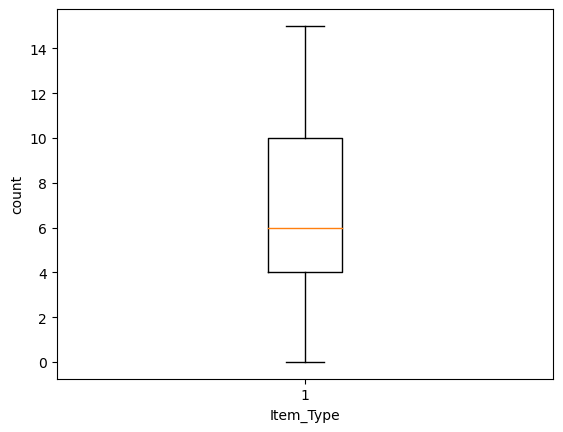

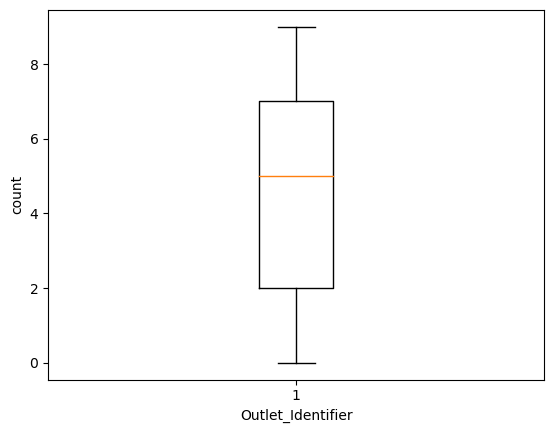

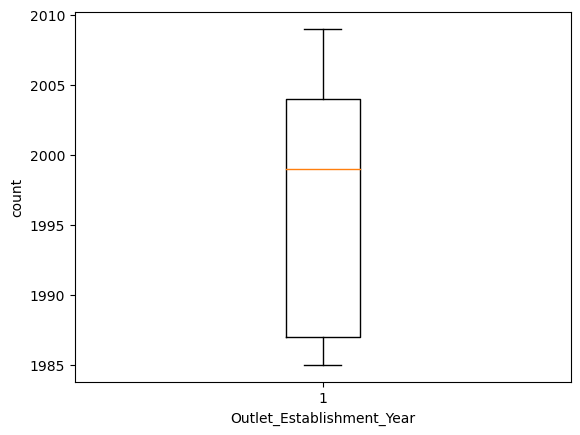

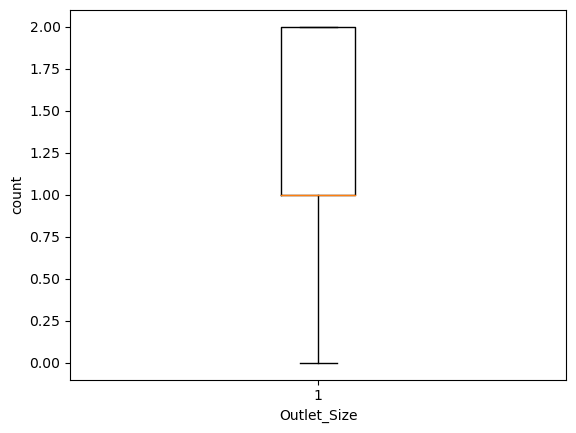

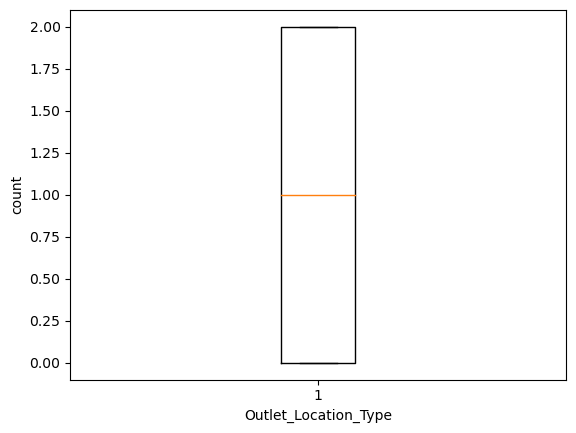

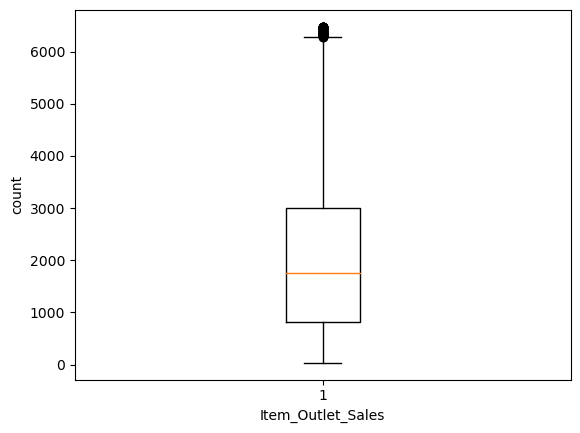

In [29]:
for j in col_names:
        plt.boxplot(Data[j])
        plt.xlabel(j)
        plt.ylabel('count')
        plt.show()

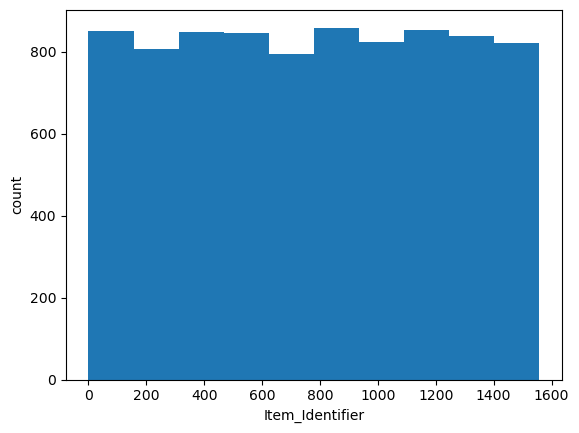

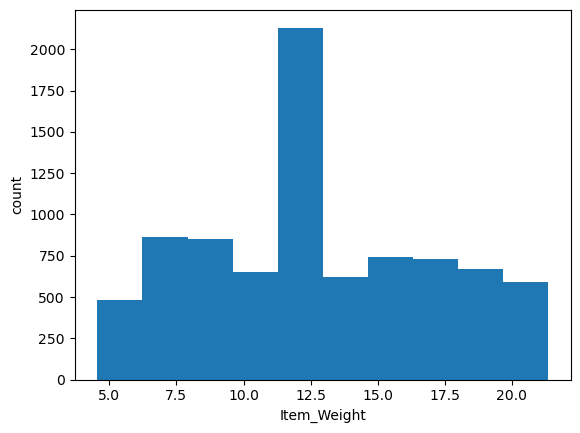

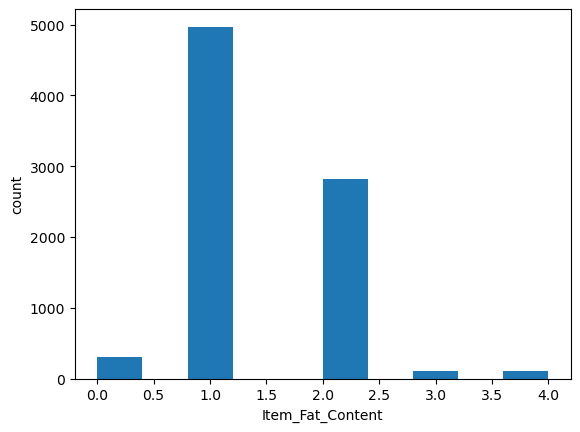

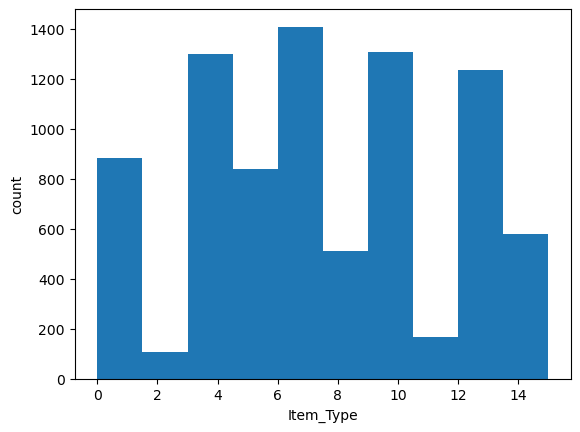

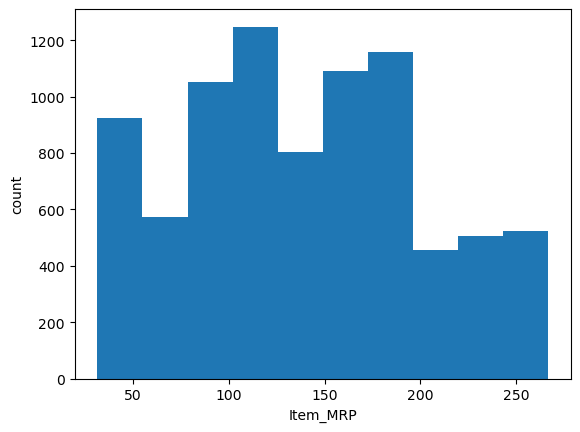

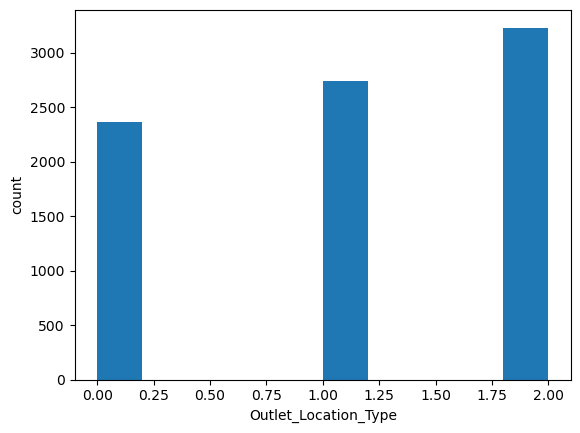

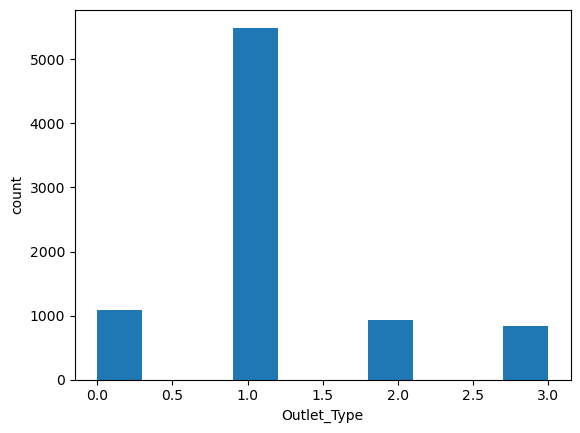

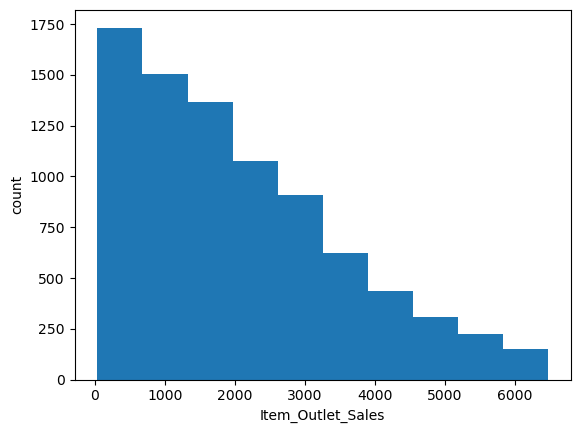

In [30]:
for i in col_names:
        plt.hist(Data[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [31]:
sns.histplot(Data['Item_Outlet_Sales'], kde = True, color = "Blue")

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

 "Item_Outlet_Sales" has right skewness

In [32]:
sales_by_Outlet_type = Data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index()

fig = px.bar(sales_by_Outlet_type,x='Outlet_Type',y='Item_Outlet_Sales',title='Sales by Outlet_type')
fig.show()

Insight: Item_Outlet_Sales are maximum for outlet_type Super market type1

In [33]:
sales_by_Outlet_location = Data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().reset_index()

fig = px.bar(sales_by_Outlet_location,x='Outlet_Location_Type',y='Item_Outlet_Sales',title='Sales by Outlet_Location')
fig.show()

## Feature Selection

Checking the correlation of different columns of dataset

In [34]:
Data.corr()

Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier                   1.000000     0.044646         -0.099225   
Item_Weight                       0.044646     1.000000         -0.018188   
Item_Fat_Content                 -0.099225    -0.018188          1.000000   
Item_Visibility                  -0.028190    -0.017255          0.032582   
Item_Type                        -0.017106     0.029907         -0.113901   
Item_MRP                          0.011698     0.025420          0.000065   
Outlet_Identifier                -0.009857    -0.008109         -0.001204   
Outlet_Establishment_Year        -0.012592    -0.009169         -0.001355   
Outlet_Size                      -0.000013    -0.007249         -0.012985   
Outlet_Location_Type              0.003868     0.003816         -0.004032   
Outlet_Type                      -0.002655    -0.001093         -0.003031   
Item_Outlet_Sales                 0.001714     0.012866          0.012301   

                           Item_Visibility  Item_Type  Item_MRP  \
Item_Identifier                  -0.028190  -0.017106  0.011698   
Item_Weight                      -0.017255   0.029907  0.025420   
Item_Fat_Content                  0.032582  -0.113901  0.000065   
Item_Visibility                   1.000000  -0.037883  0.000129   
Item_Type                        -0.037883   1.000000  0.035217   
Item_MRP                          0.000129   0.035217  1.000000   
Outlet_Identifier                -0.107739   0.000917  0.001499   
Outlet_Establishment_Year        -0.084736   0.005464  0.024550   
Outlet_Size                       0.072980  -0.001536  0.011605   
Outlet_Location_Type             -0.025798   0.002903 -0.013488   
Outlet_Type                      -0.181274   0.002805 -0.033936   
Item_Outlet_Sales                -0.138311   0.018177  0.553334   

                           Outlet_Identifier  Outlet_Establishment_Year  \
Item_Identifier                    -0.009857                  -0.012592   
Item_Weight                        -0.008109                  -0.009169   
Item_Fat_Content                   -0.001204                  -0.001355   
Item_Visibility                    -0.107739                  -0.084736   
Item_Type                           0.000917                   0.005464   
Item_MRP                            0.001499                   0.024550   
Outlet_Identifier                   1.000000                   0.081251   
Outlet_Establishment_Year           0.081251                   1.000000   
Outlet_Size                         0.503775                   0.187603   
Outlet_Location_Type               -0.722075                  -0.068123   
Outlet_Type                         0.101306                  -0.084180   
Item_Outlet_Sales                   0.181168                   0.007101   

                           Outlet_Size  Outlet_Location_Type  Outlet_Type  \
Item_Identifier              -0.000013              0.003868    -0.002655   
Item_Weight                  -0.007249              0.003816    -0.001093   
Item_Fat_Content             -0.012985             -0.004032    -0.003031   
Item_Visibility               0.072980             -0.025798    -0.181274   
Item_Type                    -0.001536              0.002903     0.002805   
Item_MRP                      0.011605             -0.013488    -0.033936   
Outlet_Identifier             0.503775             -0.722075     0.101306   
Outlet_Establishment_Year     0.187603             -0.068123    -0.084180   
Outlet_Size                   1.000000             -0.615695    -0.201479   
Outlet_Location_Type         -0.615695              1.000000     0.455670   
Outlet_Type                  -0.201479              0.455670     1.000000   
Item_Outlet_Sales            -0.083648              0.057946     0.372522   

                           Item_Outlet_Sales  
Item_Identifier                     0.001714  
Item_Weight                         0.012866  
Item_Fat_Content                  

In [35]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(), annot = True, cmap = 'rainbow')

<AxesSubplot:>

 Insight:Item_MRP,Outlet_type seems to have maximum correlation with Item_outlet_sales and 'Outlet_Establishment_Year' does not have much impact on Item_outlet_sales. 

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in Data.columns:
    if(col!='Item_Outlet_Sales'):
        col_list.append(col)

Checking the presence of multicollinearity as it adversly affects the model's performance

In [37]:
col_list

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [38]:
X = Data[col_list] 
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

feature  VIF values
0             Item_Identifier    4.062211
1                 Item_Weight   10.187256
2            Item_Fat_Content    5.626206
3             Item_Visibility    3.237553
4                   Item_Type    4.012174
5                    Item_MRP    6.134407
6           Outlet_Identifier   15.425388
7   Outlet_Establishment_Year   62.970416
8                 Outlet_Size    7.950066
9        Outlet_Location_Type   16.256208
10                Outlet_Type    8.254294

Dropping the "Outlet_Establishment_Year" column since it has maximum VIF value

In [39]:
X=X.drop(['Outlet_Establishment_Year'], axis = 1)

In [40]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

feature  VIF values
0       Item_Identifier    3.818701
1           Item_Weight    8.772292
2      Item_Fat_Content    5.022010
3       Item_Visibility    3.075677
4             Item_Type    3.777621
5              Item_MRP    5.712948
6     Outlet_Identifier   10.743819
7           Outlet_Size    6.689636
8  Outlet_Location_Type    9.776246
9           Outlet_Type    7.564779

Dropping the "Outlet_Identifier" column since it has maximum VIF value

In [41]:
X=X.drop(['Outlet_Identifier'], axis = 1)


In [42]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
vif_data

feature  VIF values
0       Item_Identifier    3.731309
1           Item_Weight    8.212229
2      Item_Fat_Content    4.775533
3       Item_Visibility    3.064332
4             Item_Type    3.675623
5              Item_MRP    5.496828
6           Outlet_Size    5.898202
7  Outlet_Location_Type    4.878611
8           Outlet_Type    4.298432

In [43]:
data=Data.loc[:,["Item_Identifier","Item_Weight","Item_Fat_Content","Item_Visibility",
                 "Item_Type","Item_MRP","Outlet_Size","Outlet_Location_Type","Outlet_Type"]]

In [44]:
data

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.066132   
4                1297        8.930                 1         0.066132   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Size  Outlet_Location_Type  Outlet_Type  
0             4  249.8092            1                     0            1  
1            14   48.2692            1                     2            2  
2            10  141.6180            1                     0            1  
3             6  182.0950            1                     2            0  
4             9   53.8614            0                     2            1  
...         ...       ...          ...                   ...          ...  
8518         13  214.5218            0                     2            1  
8519          0  108.1570            1                     1            1  
8520          8   85.1224            2                     1            1  
8521         13  103.1332            1                     2            2  
8522         14   75.4670            2                     0            1  

[8337 rows x 9 columns]

Preparing the training and validation datasets for model building and model training

In [45]:
x=data.iloc[:,:]
y=Data["Item_Outlet_Sales"]

In [46]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8337, dtype: float64

Applying all the changes to test dataset which we made in training dataset

In [47]:
col_names=test.columns
for i in col_names:
    if test[i].dtype == "object":
        test[i] = test[i].fillna(test[i].mode()[0])
    else:
        test[i] = test[i].fillna(test[i].mean())  

In [48]:
for i in col_names:
    if test[i].dtype=="object":
        test[i]=le.fit_transform(test[i])
     

In [49]:
test.loc[test['Item_Visibility']==0,'Item_Visibility'] = test['Item_Visibility'].mean()

In [50]:
col_list = []
for col in test.columns:
    col_list.append(col)

In [51]:
X = test[col_list] 
X=X.drop(['Outlet_Establishment_Year'], axis = 1)
X=X.drop(['Outlet_Identifier'], axis = 1)


In [52]:
modified_test=test.loc[:,["Item_Identifier","Item_Weight","Item_Fat_Content","Item_Visibility",
                 "Item_Type","Item_MRP","Outlet_Size","Outlet_Location_Type","Outlet_Type"]]

In [53]:
modified_test

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 1         0.007565   
1                1067     8.300000                 4         0.038428   
2                1406    14.600000                 1         0.099575   
3                 809     7.315000                 1         0.015388   
4                1184    12.695633                 2         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 2         0.013496   
5677              306     7.600000                 2         0.142991   
5678             1412    10.000000                 1         0.073529   
5679              517    15.300000                 2         0.065684   
5680              987     9.500000                 2         0.104720   

      Item_Type  Item_MRP  Outlet_Size  Outlet_Location_Type  Outlet_Type  
0            13  107.8622            1                     0            1  
1             4   87.3198            1                     1            1  
2            11  241.7538            1                     2            0  
3            13  155.0340            1                     1            1  
4             4  234.2300            1                     2            3  
...         ...       ...          ...                   ...          ...  
5676         13  141.3154            2                     0            1  
5677         15  169.1448            1                     2            2  
5678          8  118.7440            1                     1            1  
5679          3  214.6218            1                     1            1  
5680          3   79.7960            1                     1            1  

[5681 rows x 9 columns]

# Model building

In [54]:
 from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=58)
 x_train.shape, y_train.shape

((6669, 9), (6669,))

# Linear regression model

In [55]:
l_model = LinearRegression()

In [56]:
l_model.fit(x_train,y_train)

LinearRegression()

In [57]:
# checking predictions
predictions=l_model.predict(x_test)

In [58]:
predictions

array([2763.07053113, 2015.81705427, 1102.19457009, ..., 1842.14286097,
       3352.41723964,  677.92173636])

In [59]:
y_test

2488    3142.5760
4522    2011.3818
2104     970.7364
6739     871.5322
6949    1116.5466
          ...    
857     3086.6488
604     2812.3392
4445    2246.4092
4807    1874.8928
6346     629.1810
Name: Item_Outlet_Sales, Length: 1668, dtype: float64

In [60]:
r2_score(predictions,y_test)

-0.0928615025750914

In [61]:
mse=mean_squared_error(predictions,y_test)

In [62]:
rmse=np.sqrt(mse)  

In [63]:
rmse

1085.634037082387

In [64]:
print(f"Mean squared error for regression: {mse}")

Mean squared error for regression: 1178601.2624718018


In [65]:
print(f"Root Mean squared error for regression: {rmse}")

Root Mean squared error for regression: 1085.634037082387


# Random forest regressor

In [66]:
rf_model=RandomForestRegressor()

In [67]:
mdl = rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [68]:
print(f"score of model: {rf_model.score(x_train,y_train)}")

score of model: 0.9345932123184509


In [69]:
y_pred_forest = rf_model.predict(x_test)

In [70]:
forest_mse = mean_squared_error(y_test, y_pred_forest)

In [71]:
forest_rmse = np.sqrt(forest_mse)

In [72]:
print(f"Root mean squared error: {forest_rmse}")

Root mean squared error: 1040.7830067147256


### fine_tuning, searching for the best combination of hyperparameter values for the RandomForestRegressor

In [73]:
grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

In [74]:
gr_search = GridSearchCV(rf_model, grid, cv=5,
            scoring='neg_mean_squared_error')
gr_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [75]:
#the best combinations parameters
gr_search.best_params_

{'max_features': 2, 'n_estimators': 30}

all scores for each combined parameters
showing the error score 

In [76]:
cvres = gr_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1148.2725042030238 {'max_features': 2, 'n_estimators': 3}
1056.0207586157305 {'max_features': 2, 'n_estimators': 10}
1015.5756771951561 {'max_features': 2, 'n_estimators': 30}
1162.3583402371235 {'max_features': 4, 'n_estimators': 3}
1061.5252972392213 {'max_features': 4, 'n_estimators': 10}
1026.0216784878698 {'max_features': 4, 'n_estimators': 30}
1161.9129554490883 {'max_features': 6, 'n_estimators': 3}
1060.7687742389933 {'max_features': 6, 'n_estimators': 10}
1034.012029111261 {'max_features': 6, 'n_estimators': 30}
1155.0812190716172 {'max_features': 8, 'n_estimators': 3}
1061.376495782964 {'max_features': 8, 'n_estimators': 10}
1043.8928229557548 {'max_features': 8, 'n_estimators': 30}
1161.66741018253 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1073.9056604459097 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1158.4431055586497 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1081.4304139971941 {'bootstrap': False, 'max_features': 3, 'n_est

In [77]:
Random_Forest_model = RandomForestRegressor(n_estimators=30,max_features=2)
model = Random_Forest_model.fit(x_train, y_train)
y_pred = Random_Forest_model.predict(x_test)

In [78]:
for_mse = mean_squared_error(y_test, y_pred)

In [79]:
for_rmse = np.sqrt(for_mse)

In [80]:
print(f"Root mean squared error: {for_rmse}")

Root mean squared error: 1023.3717493010091


In [81]:
print(f"score of model: {Random_Forest_model.score(x_train,y_train)}")

score of model: 0.9331735848244216


# Decision tree regressor

In [82]:
Dtree_reg = DecisionTreeRegressor()
Dtree_reg.fit(x_train,y_train)
Dtree_reg.score(x_train,y_train)

1.0

It appears as overfitting

In [83]:
y_pred = Dtree_reg.predict(x_test)


In [84]:
tree_mse = mean_squared_error(y_test,y_pred)

In [85]:
tree_rmse = np.sqrt(tree_mse)

In [86]:
tree_rmse

1384.2958996222621

 we will use the RandomForestRegressor as it is giving lowest error than other two model

 predicting the required column from test dataframe

 scaling the test data

In [87]:
scaler = StandardScaler()
scaler.fit(modified_test)
stnd_test = scaler.transform(modified_test)
stnd_test = pd.DataFrame(data =stnd_test, columns=modified_test.columns )

In [88]:
#with modified_test data
predicted = Random_Forest_model.predict(stnd_test)

predicted

array([539.45335333, 464.86156   , 377.37544   , ..., 445.0873    ,
       480.35250667, 246.87864   ])

In [89]:
stnd_test

Item_Identifier   Item_Weight  Item_Fat_Content  Item_Visibility  \
0            0.739896  1.897460e+00         -0.575284        -1.285395   
1            0.659085 -1.035530e+00          4.104698        -0.647603   
2            1.420050  4.486336e-01         -0.575284         0.616028   
3            0.079943 -1.267578e+00         -0.575284        -1.123718   
4            0.921719 -5.230960e-14          0.984710         1.009174   
...               ...           ...               ...              ...   
5676        -1.217514 -5.172506e-01          0.984710        -1.162816   
5677        -1.049159 -1.200437e+00          0.984710         1.513236   
5678         1.433519 -6.350414e-01         -0.575284         0.077770   
5679        -0.575520  6.135406e-01          0.984710        -0.084344   
5680         0.479506 -7.528321e-01          0.984710         0.722356   

      Item_Type  Item_MRP  Outlet_Size  Outlet_Location_Type  Outlet_Type  
0      1.366916 -0.536555    -0.284737             -1.369215    -0.252769  
1     -0.766450 -0.868937    -0.284737             -0.138827    -0.252769  
2      0.892835  1.629848    -0.284737              1.091560    -1.507994  
3      1.366916  0.226697    -0.284737             -0.138827    -0.252769  
4     -0.766450  1.508110    -0.284737              1.091560     2.257683  
...         ...       ...          ...                   ...          ...  
5676   1.366916  0.004727     1.381166             -1.369215    -0.252769  
5677   1.840998  0.455014    -0.284737              1.091560     1.002457  
5678   0.181713 -0.360485    -0.284737             -0.138827    -0.252769  
5679  -1.003490  1.190844    -0.284737             -0.138827    -0.252769  
5680  -1.003490 -0.990674    -0.284737             -0.138827    -0.252769  

[5681 rows x 9 columns]

In [ ]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

## We have build a RandomForest Regressor model that has Root Mean Squared Error value = 1023.37 and score = 0.93 